In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import scipy.integrate as integrate

from vivarium_helpers.prob_distributions import plotting, fit

!date
!whoami
!uname -a
!pwd

Fri Feb 17 20:04:46 PST 2023
ndbs
Darwin ndbs-Q9Q94K6GHF 21.6.0 Darwin Kernel Version 21.6.0: Mon Dec 19 20:43:09 PST 2022; root:xnu-8020.240.18~2/RELEASE_ARM64_T6000 arm64
/Users/ndbs/repos/vivarium_data_analysis/probability


# Try plotting cross-sections of some Archimedian copulas

https://en.wikipedia.org/wiki/Copula_(probability_theory)#Archimedean_copulas

# Ali–Mikhail–Haq copula

Distribution function:

$$
F(u,v\mid \theta) = \frac {uv}{1-\theta (1-u)(1-v)},
\quad \theta\in [-1,1]
$$

In [67]:
def amh_copula(u,v,theta):
    return u*v / (1-theta*(1-u)*(1-v))

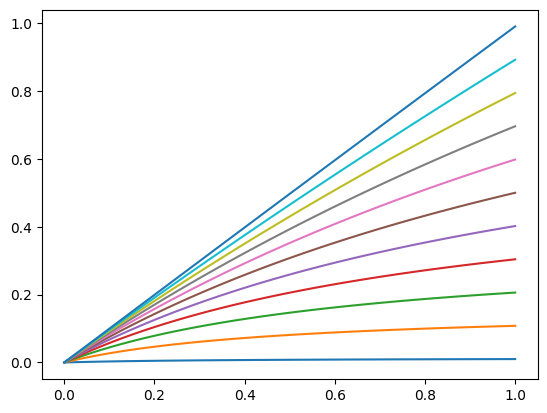

In [120]:
fig, ax = plt.subplots()

theta = 0.75
vs = np.linspace(0.01, 0.99, 11)
u = np.linspace(0,1)

for v in vs:
    ax.plot(u, amh_copula(u,v,theta))

# Get density function from Wolfram Alpha

$$
\frac{\partial^2 F}{\partial u\, \partial v}
= \frac{\partial^2}{\partial u\, \partial v}
\frac{u v}{1 - \theta (1 - u) (1 - v)}
= \frac{\theta^2 (u (-v) + u + v - 1) - \theta (u v + u + v - 2) - 1}
{(\theta (u - 1) (v - 1) - 1)^3}
$$

In [69]:
def amh_copula_density(u,v,theta):
    numerator = theta**2 * (-u*v + u + v - 1) - theta * (u*v + u + v - 2) - 1
    denominator = (theta * (u-1) * (v-1) - 1)**3
    return numerator / denominator

[(1.0000000000000004, 2.5509791893520873e-09),
 (1.0, 1.3800231549191223e-10),
 (1.0, 3.654786780770616e-11),
 (1.0000000000000002, 4.197739473846006e-12),
 (0.9999999999999997, 3.6898080360231696e-13),
 (0.9999999999999999, 2.8000982972275175e-14),
 (0.9999999999999999, 1.1102230246251564e-14),
 (1.0, 1.1102230246251565e-14),
 (0.9999999999999999, 1.1102230246251564e-14),
 (1.0, 1.1102230246251565e-14),
 (1.0, 1.1102230246251565e-14),
 (1.0, 1.1102230246251565e-14),
 (1.0, 1.1102230246251565e-14),
 (1.0, 1.1102230246251565e-14),
 (1.0, 1.1102230246251565e-14),
 (1.0, 1.1102230246251565e-14),
 (1.0, 1.1102230246251565e-14),
 (1.0, 1.1102230246251565e-14),
 (1.0, 1.1102230246251565e-14),
 (1.0, 1.1102230246251565e-14)]

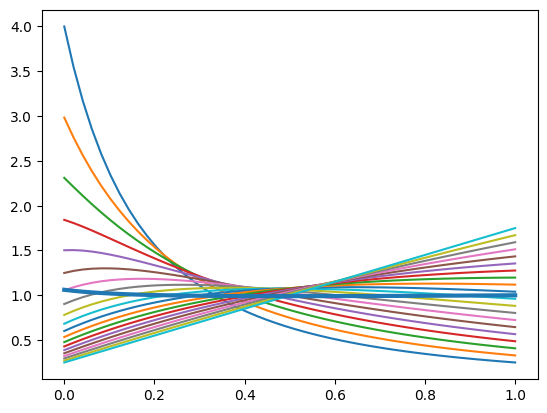

In [176]:
fig, ax = plt.subplots()

theta = 0.75
num_vs = 20
vs = np.linspace(0, 1, num_vs)
u = np.linspace(0,1)

amh_mixture_density = sum(amh_copula_density(u,v,theta) for v in vs) / num_vs

integrals = []

# ax.set_prop_cycle('color', [plt.cm.seismic(v) for v in vs])

for v in vs:
    ax.plot(u, amh_copula_density(u,v,theta))
    integrals.append(integrate.quad(lambda u: amh_copula_density(u,v,theta), 0,1))

ax.plot(u, amh_mixture_density, lw=3);
integrals

# Gumbel copula

$$
G(u,v\mid \theta) = {\textstyle \exp \!\left[-\left((-\log(u))^{\theta }+(-\log(v))^{\theta }\right)^{1/\theta }\right]},
\quad \theta\ge 1
$$

## Density function from Wolfram alpha

$$
\begin{align}
\frac{\partial^2 G}{\partial u\, \partial v}
&= \frac{1}{u v}
\bigl((-\log(u))^{\theta - 1} (-\log(v)\bigr)^{\theta - 1}
\exp \!\left[-\left((-\log(u))^{\theta }+(-\log(v))^{\theta }\right)^{1/\theta }\right]\\
%e^{-((-\log(u))^\theta + (-\log(v))^\theta)^{1/\theta}}\\
&\qquad\qquad \times \bigl((-\log(u))^\theta + (-\log(v))^\theta \bigr)^{1/\theta - 2}
\bigl((-\log(u))^\theta + (-\log(v))^\theta)^{1/\theta} + \theta - 1\bigr)
\end{align}
$$

### Code for using colormap to plot densities...

- ...came from this answer: https://stackoverflow.com/a/52475959
- to this question: https://stackoverflow.com/questions/38208700/matplotlib-plot-lines-with-colors-through-colormap
- Colormap reference: https://matplotlib.org/stable/gallery/color/colormap_reference.html
- More info on colormaps: https://matplotlib.org/stable/tutorials/colors/colormaps.html

In [91]:
def gumbel_log_term(u,v,theta):
    return (-np.log(u))**theta + (-np.log(v))**theta

def gumbel_copula(u,v,theta):
    return np.exp(-gumbel_log_term(u,v,theta)**(1/theta))

def gumbel_copula_density(u,v,theta):
    logs_to_theta = gumbel_log_term(u,v,theta)
    a = 1/(u*v)
    b = (-np.log(u))**(theta-1) * (-np.log(v))**(theta-1)
    c = gumbel_copula(u, v, theta)
    d = logs_to_theta**(1/theta - 2)
    e = logs_to_theta**(1/theta) + theta - 1
    return a*b*c*d*e

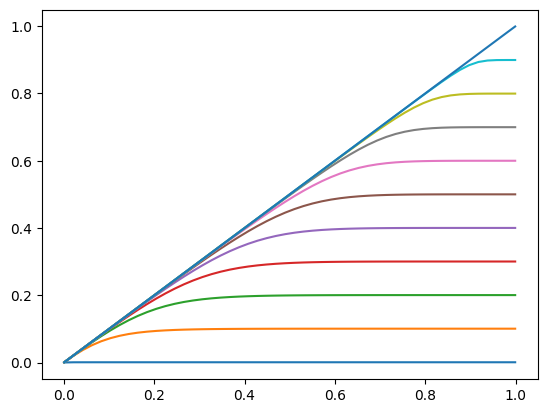

In [92]:
fig, ax = plt.subplots()

theta = 5
vs = np.linspace(0.001, 0.999, 11)
u = np.linspace(0.001,0.999)

for v in vs:
    ax.plot(u, gumbel_copula(u,v,theta))

[(0.9821254110225204, 1.2537302038454752e-08),
 (0.9999810918826522, 9.505478463753363e-10),
 (0.9999966860683824, 1.1252808103891999e-08),
 (0.999998993126835, 3.378433995493313e-09),
 (0.9999996150562351, 1.137902971848348e-08),
 (0.9999998334760511, 9.216668206413203e-09),
 (0.999999922714252, 2.8447393329855686e-09),
 (0.9999999626328113, 1.6189712903624809e-09),
 (0.9999999816076277, 4.213261406427193e-09),
 (0.9999999908836582, 2.8325788381522443e-09),
 (0.9999999955264779, 1.4958976279899616e-09),
 (0.9999999978527715, 7.541898232963001e-09),
 (0.9999999990201596, 1.1360900641661596e-08),
 (1.000000000057021, 1.1203701841700636e-08),
 (1.0000000000222677, 6.294965985975676e-09),
 (1.0000000000074927, 1.4180612262134325e-09),
 (1.0000000000019749, 3.9293012062385085e-10),
 (1.0000000000003297, 6.31084648386186e-11),
 (1.0000000000000024, 4.269288856314823e-12),
 (0.9999920160631637, 3.1753151043863864e-09)]

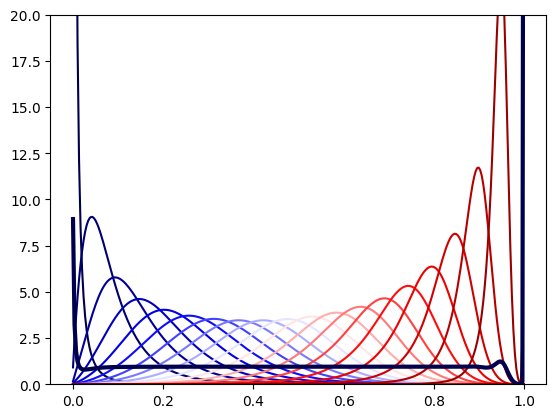

In [191]:
fig, ax = plt.subplots()

theta = 5
num_vs = 20
vs = np.linspace(0.001, 0.999, num_vs)
u = np.linspace(0.001, 0.999, 300)

gumbel_mixture_density = sum(gumbel_copula_density(u,v,theta) for v in vs) / num_vs

integrals = []

ax.set_prop_cycle('color', [plt.cm.seismic(v) for v in vs])

for v in vs:
    ax.plot(u, gumbel_copula_density(u,v,theta))
    integrals.append(integrate.quad(
        lambda u: gumbel_copula_density(u,v,theta), 0.0001,0.9999))

ax.plot(u, gumbel_mixture_density, lw=3);
ax.set_ylim(0,20)
integrals

(0.0, 5.0)

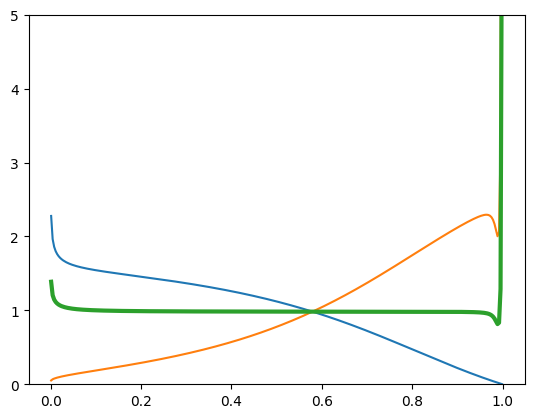

In [282]:
fig, ax = plt.subplots()

theta = 2
num_vs = 50
vs = np.linspace(0.001, 0.999, num_vs)
u = np.linspace(0.001, 0.999, 300)

cutoff = 0.6

mixand_group_1 = [gumbel_copula_density(u,v,theta) for v in vs if v < cutoff] 
mixand_group_2 = [gumbel_copula_density(u,v,theta) for v in vs if v >= cutoff]

submixture_1 = sum(mixand_group_1) / len(mixand_group_1)
submixture_2 = sum(mixand_group_2) / len(mixand_group_2)

# gumbel_mixture_density = sum(gumbel_copula_density(u,v,theta) for v in vs) / num_vs
gumbel_mixture_density = (sum(mixand_group_1) + sum(mixand_group_2)) / num_vs

# integrals = []

# ax.set_prop_cycle('color', [plt.cm.seismic(v) for v in vs])

# for v in vs:
#     ax.plot(u, gumbel_copula_density(u,v,theta))
#     integrals.append(integrate.quad(
#         lambda u: gumbel_copula_density(u,v,theta), 0.0001,0.9999))

ax.plot(u, submixture_1)
ax.plot(u, submixture_2)
ax.plot(u, gumbel_mixture_density, lw=3);
ax.set_ylim(0,5)
# integrals

# Clayton copula

$\theta \in [-1,\infty)\setminus \{0\}$

In [165]:
def clayton_copula(u,v,theta):
#     u,v = map(np.asarray, (u,v))
    if theta:
        y = u**(-theta) + v**(-theta) - 1
        cdf = np.where(y>0, y**(-1/theta), 0)
        return cdf
    else:
        # independent copula CDF when theta=0
        return u*v

def clayton_copula_density(u,v,theta):
#     u,v = map(np.asarray, (u,v))
    if theta:
        y = u**(-theta) + v**(-theta) - 1
        pdf = np.where(y>0, (theta+1)*(u*v)**(-theta-1)*y**(-1/theta-2), 0)
        return pdf
    else:
        # constant density for independent copula when theta=0
        return u*v / (u*v)

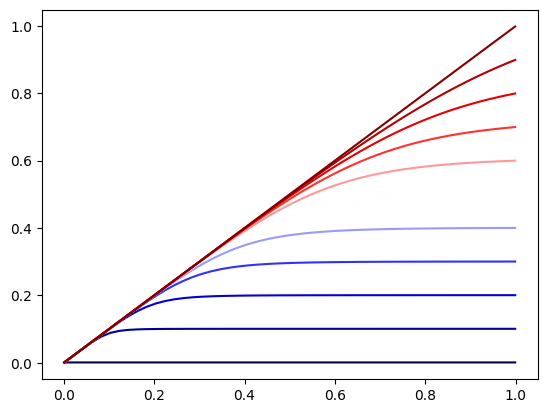

In [174]:
fig, ax = plt.subplots()

theta = 5
vs = np.linspace(0.001, 0.999, 11)
u = np.linspace(0.001,0.999)

ax.set_prop_cycle('color', [plt.cm.seismic(v) for v in vs])

for v in vs:
    ax.plot(u, clayton_copula(u,v,theta))

[(0.9999999899998826, 4.117518770385686e-09),
 (0.999999999998994, 5.113493805225825e-10),
 (0.9999999998792434, 5.069278665727987e-10),
 (0.9999999979817162, 3.299690292313224e-11),
 (0.999999985046009, 5.387553706924422e-10),
 (0.9999999291653581, 9.625465330301253e-09),
 (0.9999997473078007, 3.34314439254507e-11),
 (0.99999925895396, 4.680487565664887e-09),
 (0.9999981174025454, 5.594970367540052e-10),
 (0.9999957142966905, 2.7546766147914584e-09),
 (0.9999910529296685, 9.759310284693135e-09),
 (0.9999825859013405, 2.1065333363336722e-09),
 (0.9999680127239913, 3.509499741690072e-11),
 (0.999944033029774, 3.4360648657865204e-12),
 (0.9999060511305136, 6.441983492000772e-09),
 (0.9998478278519846, 1.402798764248061e-09),
 (0.9997610758494636, 1.5377605614075875e-10),
 (0.9996349950659252, 7.212797296346604e-12),
 (0.9994557456953702, 1.779514218238612e-14),
 (0.9992058570627933, 1.1093413488514262e-14)]

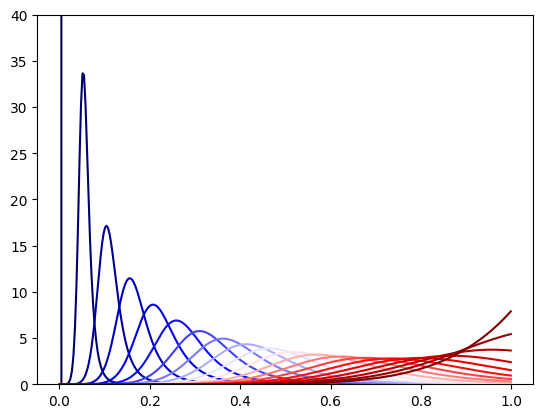

In [193]:
fig, ax = plt.subplots()

theta = 7
num_vs = 20
vs = np.linspace(0.001, 0.999, num_vs)
u = np.linspace(0.001, 0.999, 300)

clayton_mixture_density = sum(clayton_copula_density(u,v,theta) for v in vs) / num_vs

integrals = []

ax.set_prop_cycle('color', [plt.cm.seismic(v) for v in vs])

for v in vs:
    ax.plot(u, clayton_copula_density(u,v,theta))
    integrals.append(integrate.quad(
        lambda u: clayton_copula_density(u,v,theta), 0.0001,0.9999))

# ax.plot(u, clayton_mixture_density, lw=3);
ax.set_ylim(0,40)
integrals

In [199]:
clayton_copula(0.001, 0.999, 7)

array(0.001)

In [203]:
clayton_copula_density(0.1, 0.99, 7)

array(8.66978691e-07)

In [213]:
us = np.array([.001, .01, 0.1, .2])
clayton_copula_density(us, 0.999, 7)

array([8.06428896e-21, 8.06428896e-14, 8.06428895e-07, 1.03222879e-04])

In [218]:
clayton_copula_density(u, 0.999, 7).max()

7.889548520959119

In [238]:
clayton_copula_density(u, 0.001, 7).max()

1811.4473285278202

In [245]:
us = np.array([.0009, .001, .0011])
clayton_copula_density(us, 0.001, 7)

array([1655.81782731, 1811.44732853, 1536.32154983])

In [286]:
def symmetrized(f):
    def symmetrized_f(u, v, theta):
        return (f(u, v, theta) + f(1-u, 1-v, theta))/2
    return symmetrized_f

(<AxesSubplot: >,
 [(0.9996029235313378, 2.0587803128968574e-09),
  (0.999727872847182, 2.492557179265605e-10),
  (0.9998174974725845, 2.3744302669339266e-10),
  (0.9998805369155896, 1.0656522685115188e-08),
  (0.9999239064489966, 2.2290766411511842e-10),
  (0.999952990147936, 4.244115732484475e-09),
  (0.999971890168787, 9.536619532263257e-09),
  (0.9999836358389758, 2.066221726267775e-09),
  (0.9999903516519429, 1.22900069708296e-09),
  (0.9999933836131758, 1.2365791171680002e-08),
  (0.9999933836131755, 1.2365791171680425e-08),
  (0.9999903516519429, 1.2290006462677594e-09),
  (0.9999836358389761, 2.066221699813242e-09),
  (0.9999718901687874, 9.536619556549386e-09),
  (0.9999529901479364, 4.2441157620770465e-09),
  (0.9999239064489971, 2.2290773328721702e-10),
  (0.9998805369155899, 1.0656522674706848e-08),
  (0.9998174974725844, 2.3744315629620986e-10),
  (0.9997278728471818, 2.492558114728792e-10),
  (0.9996029235313162, 2.058777370805842e-09)])

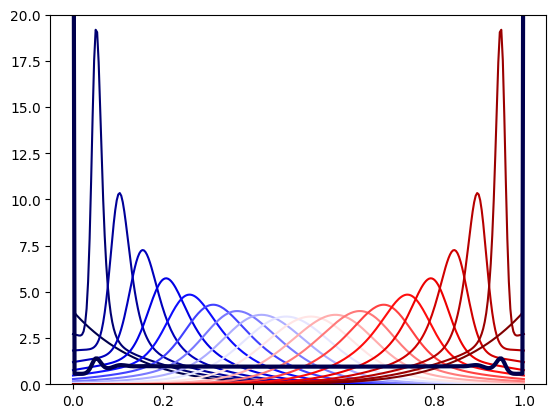

In [314]:
fig, ax = plt.subplots()

theta = 7
num_vs = 20
density_function = symmetrized(clayton_copula_density)

def plot_copula_densities(density_function, theta, num_vs, ax=None):
    if ax is None:
        ax = plt.gca()
        
    vs = np.linspace(0.001, 0.999, num_vs)
    u = np.linspace(0.001, 0.999, 300)
    mixture_density = sum(density_function(u,v,theta) for v in vs) / num_vs

    integrals = []

    ax.set_prop_cycle('color', [plt.cm.seismic(v) for v in vs])

    for v in vs:
        ax.plot(u, density_function(u,v,theta))
        integrals.append(integrate.quad(
            lambda u: density_function(u,v,theta), 0.0001,0.9999))

    ax.plot(u, mixture_density, lw=3);
    ax.set_ylim(0,20)
    return ax, integrals

plot_copula_densities(density_function, theta, num_vs, ax)

Integral farthest from 1: (0.9932320634570433, 9.054946780910604e-11)


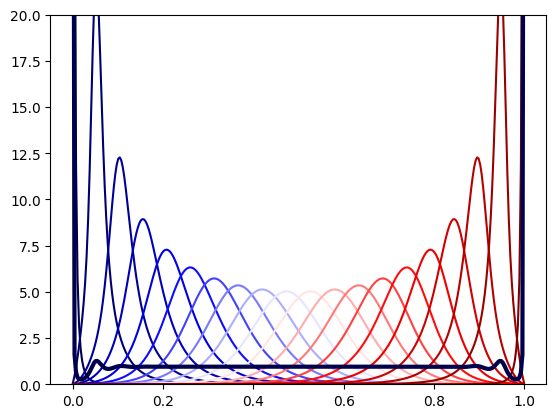

In [315]:
theta = 7
num_vs = 20
density_function = symmetrized(gumbel_copula_density)

ax, integrals = plot_copula_densities(density_function, theta, num_vs)
print('Integral farthest from 1:', max(integrals, key=lambda t: np.abs(t[0]-1)))

Integral farthest from 1: (0.9994043033130116, 8.014934599882003e-12)


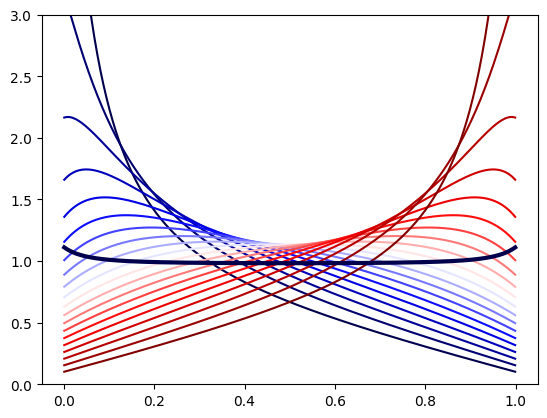

In [331]:
theta = 0.9
num_vs = 20
density_function = symmetrized(amh_copula_density)

ax, integrals = plot_copula_densities(density_function, theta, num_vs)
ax.set_ylim(0,3)
print('Integral farthest from 1:', max(integrals, key=lambda t: np.abs(t[0]-1)))

In [301]:
max(integrals, key=lambda t: t[1])

(0.9999990374563216, 1.3753992722520536e-08)

In [302]:
max(integrals, key=lambda t: np.abs(t[0]-1))

(0.9932320634570433, 9.054946780910604e-11)

In [332]:
!conda list

# packages in environment at /opt/homebrew/Caskroom/miniconda/base/envs/vivarium_helpers39:
#
# Name                    Version                   Build  Channel
anyio                     3.6.2                    pypi_0    pypi
appnope                   0.1.3                    pypi_0    pypi
argon2-cffi               21.3.0                   pypi_0    pypi
argon2-cffi-bindings      21.2.0                   pypi_0    pypi
asttokens                 2.1.0                    pypi_0    pypi
attrs                     22.1.0                   pypi_0    pypi
babel                     2.11.0                   pypi_0    pypi
backcall                  0.2.0                    pypi_0    pypi
beautifulsoup4            4.11.1                   pypi_0    pypi
bleach                    5.0.1                    pypi_0    pypi
bzip2                     1.0.8                h3422bc3_4    conda-forge
ca-certificates           2022.9.24            h4653dfc_0    conda-forge
certifi                   2022.9.